## 11. Problemas de autovalores e autovetores

Como já sabemos, em muitas áreas existem problemas que envolvem componentes relacionados de alguma forma. Por exemplo, os circuitos elétricos têm esta característica, assim como alguns problemas em mecânica e em outras áreas (Boyce, 2020). Nestes e em casos semelhantes, existem duas (ou mais) variáveis dependentes e o problema matemático correspondente consiste em um sistema de duas (ou mais) equações diferenciais que sempre podem ser escritas como um sistema de equações de primeira ordem.

Supondo que um sistema linear homogêneo

$$
\mathbf{y}^{\prime}=\mathbf{A y}
$$

possua coeficientes constantes. Vamos tentar uma solução na forma $
\mathbf{y}=\mathbf{x} e^{\lambda t}$. Substituindo no sistema, obtemos 
$\mathbf{y}^{\prime}=\lambda \mathbf{x} e^{\lambda t}=\mathbf{A y}=\mathbf{A x} e^{\lambda t}$. Dividindo por $e^{\lambda t}$, chegamos ao problema de autovalor

$$
\mathbf{A x}=\lambda \mathbf{x} .
$$

Portanto, as soluções não-triviais do sistema têm a forma $\mathbf{y}=\mathbf{x} e^{\lambda t}$, onde $\lambda$ é um autovalor de $\mathbf{A}$ e $\mathbf{x}$ é um autovetor correspondente.

### 11.1 Cálculo de Autovalores e Autovetores

Encontrar os autovalores e autovetores de uma matriz $\mathbf{A}$ significa encontrar soluções não triviais da equaçao
$\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, a qual pode ser reescrita como

$$ (\mathbf{A} -\lambda \mathbf{I})\mathbf{x} = \mathbf{0} \text{.}$$ 

A última equação terá soluções não nulas se, e somente se, $\lambda$ for escolhido de modo que

$$ \text{det}(\mathbf{A} -\lambda \mathbf{I})= 0 \text{.}$$ 

Essa equação polinomial de grau $n$ em $\lambda$ é a equação característica da matriz $\mathbf{A}$. Os valores de  $\lambda$ que a satisfazem podem ser reais ou complexos e são chamados de autovalores da matriz $\mathbf{A}$. As soluções não nulas obtidas usando tal valor de $\lambda$ são os autovetores correspondentes, ou associados, àquele autovalor.

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

**Exemplo 11.1:** Encontre os autovalores e autovetores da matriz
$$
A=\left(\begin{array}{ll}
3 & -1 \\
4 & -2
\end{array} \right)\text{.}
$$

In [2]:
lamb, x1, x2 = sp.symbols('lambda x_1 x_2')
A = sp.Matrix([[3,-1],[4,-2]])
I = sp.Matrix([[1,0],[0,1]])

In [3]:
eq = sp.Eq((A-lamb*I).det(), 0)
display(eq)

In [4]:
r = sp.solve(eq)
r

Os autovalores da matriz são $\lambda_1=-1$ e $\lambda_2 = 2$.

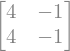

In [5]:
(A-r[0]*I)

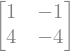

In [6]:
(A-r[1]*I)

Resolvendo o sistema $(\mathbf{A} -\lambda_1 \mathbf{I})\mathbf{x} = \mathbf{0}$ obtemos que $x_1=x_2/4$, e para $\lambda_2$ obtemos $x_1=x_2$ como é mostrado abaixo. 

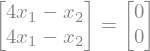

In [7]:
sp.Eq((A-r[0]*I)*sp.Matrix([[x1],[x2]]), sp.Matrix([[0],[0]]))

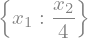

In [8]:
sp.solve([4*x1-x2, 4*x1-x2],[x1,x2])

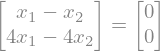

In [9]:
sp.Eq((A-r[1]*I)*sp.Matrix([[x1],[x2]]), sp.Matrix([[0],[0]]))

In [10]:
sp.solve([x1-x2,x1-x2],[x1,x2])

Assim temos os autovetores $\mathbf{v}_1 = (1,\frac{1}{4})$ e $\mathbf{v}_2=(1,1)$ (e seus múltiplos) associados aos autovalores $\lambda_1$ e $\lambda_2$. 

Usando SymPy também podemos faer simplesmente:

In [11]:
A.eigenvals()

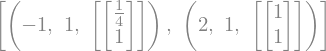

In [12]:
A.eigenvects()

**Exemplo 11.2:** Encontre a equação característica e os autovalores e autovetores da matriz

$$
A=\left(\begin{array}{lll}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}\right)
$$

In [13]:
lamb, x1, x2, x3 = sp.symbols('lambda x_1 x_2 x_3')
A = sp.Matrix([[0,1,1],[1,0,1],[1,1,0]])
I = sp.eye(3)

eq = sp.Eq((A-lamb*I).det(), 0)
display(eq)

In [14]:
r = sp.solve(eq)
r

Apenas dois atovalores distintos. Fatorando a equação notamos que $\lambda_1=-1$ tem multiplicidade algébrica $m=2$. 

In [15]:
sp.factor(eq.lhs)

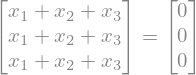

In [16]:
sp.Eq((A-r[0]*I)*sp.Matrix([x1,x2,x3]), sp.Matrix([0,0,0]))

In [17]:
M = (A-r[1]*I)
x = sp.Matrix([x1,x2,x3])

In [18]:
sp.factor(eq.lhs)

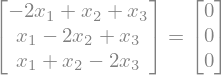

In [19]:
sp.Eq(M*x, sp.Matrix([0,0,0]))

In [20]:
sp.solve(M*x,x)

In [21]:
M = (A-r[0]*I)
sp.solve(M*x,x)

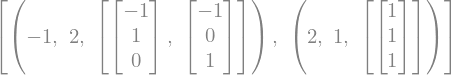

In [22]:
display(A.eigenvects())

Vamos agora concentrar nossa atenção em sistemas de duas equações diferenciais e focar nos sistemas mais simples, com equações lineares de primeira ordem com coeficientes constantes. Queremos estudar que tipo de soluções tais sistemas podem ter e como as soluções podem ser determinadas e apresentadas graficamente.

### 11.2  Sistemas lineares homogêneos com coeficientes constantes

Dado um sistema linear homogêneo com coeficientes constantes

$$
\mathbf{y}^{\prime}=\mathbf{A y}
$$


se $\mathbf{A}$ possuir um conjunto linearmente independente de $n$ autovetores, em particular se $\mathbf{A}$ for simétrica $\left(a_{k j}=a_{j k}\right)$ ou anti-simétrica $\left(a_{k j}=-a_{j k}\right)$, ou se tiver $n$ autovalores diferentes, então, as soluções do sistema serão dadas por

$$\mathbf{y}^{(1)}=\mathbf{x}^{(1)} e^{\lambda_1 t}, \quad \cdots, \quad \mathbf{y}^{(n)}=\mathbf{x}^{(n)} e^{\lambda_n t}$$

**Exemplo 11.3:** O sistema

$$\mathbf{y}^{\prime}=\left(\begin{array}{ll}1 & 1 \\ 4 & 1\end{array}\right) \mathbf{y} \text{.}$$

tem solução 

$$\mathbf{y}(t)=\binom{1}{2} e^{3 t}+\binom{1}{-2} e^{-t} \text{.}$$

Vamos calcular os autovalores e autovetores, primeiramente usando `SymPy`e depois usando `NumPy`. 

In [59]:
A = sp.Matrix([[1,1],[4,1]])
A.eigenvals()

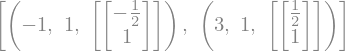

In [61]:
A.eigenvects()

Agorma com `NumPy`:

In [62]:
import numpy as sp

In [65]:
A = np.array([[1,1],[4,1]])
np.linalg.eig(A)[0]

array([ 3., -1.])

In [66]:
np.linalg.eig(A)[1]

array([[ 0.4472136 , -0.4472136 ],
       [ 0.89442719,  0.89442719]])

Observe que qualquer múltiplo de um autovetor também é um autovetor.

**Exemplo 11.4:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/405)) Vamos agora obter a solução geral de 

$$
\mathbf{y}^{\prime}=\left(\begin{array}{rrr}
-4 / 5 & -1 / 5 & 4 / 5 \\
-1 / 5 & -4 / 5 & -4 / 5 \\
2 / 5 & -2 / 5 & 3 / 5
\end{array}\right) \mathbf{y}.
$$

e plutar um gráfico com as soluções em 3D.

In [72]:
import sympy as sp
sp.init_printing()

t, lamb, c1, c2, c3 = sp.symbols('t lambda C_1 C_2 C_3')
A = sp.Matrix([[-4/5, -1/5, 4/5],
               [-1/5, -4/5, -4/5],
               [2/5, -2/5, 3/5]])

eq = sp.Eq((A-lamb*sp.eye(3)).det(),0)
display(eq)

In [73]:
sp.solve(eq)

In [74]:
sp.factor(eq)

In [75]:
v1,v2,v3 = sp.symbols('v1 v2 v3')
v = sp.Matrix([v1,v2,v3])

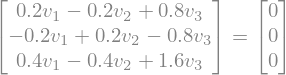

In [76]:
eq = sp.Eq((A+sp.eye(3))*v,sp.Matrix([0,0,0]))
display(eq)

In [77]:
sp.solve(eq)

Fazendo primeiro $v_2=2$ e $v_3=0$ e depois $v_2=2$ e $v_3=1$, obtemos um par de autovetores linearmente independentes associados a $\lambda_1=-1$,
$$
\mathbf{v}_1=\left(\begin{array}{l}
2 \\
2 \\
0
\end{array}\right) \quad \text { e } \quad \mathbf{v}_2=\left(\begin{array}{r}
-2 \\
2 \\
1
\end{array}\right) .
$$

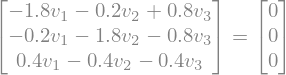

In [78]:
eq = sp.Eq((A-sp.eye(3))*v,sp.Matrix([0,0,0]))
display(eq)

In [79]:
sp.solve(eq)

Fazendo $v_3=2$, obtemos o autovetor associados a $\lambda_1=1$,

$$
\mathbf{v}_3=\left(\begin{array}{r}
1 \\
-1 \\
2
\end{array}\right)
$$


 Portanto, a solução geral  é dada por

$$
\mathbf{x}(t)=c_1 e^{-t}\left(\begin{array}{l}
2 \\
2 \\
0
\end{array}\right)+c_2 e^{-t}\left(\begin{array}{r}
-2 \\
2 \\
1
\end{array}\right)+c_3 e^t\left(\begin{array}{r}
1 \\
-1 \\
2
\end{array}\right)
$$

Trajetórias de soluções 

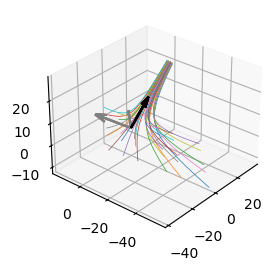

In [101]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare arrays x, y, z
t = np.linspace(-1, 2)

for c1 in [-5,-3,-2,0,1]:
    for c2 in [-5,-3,-2,0,1,2]:
        for c3 in [-2,-1,0,1,2]:
            x_1 = c1*2*np.exp(-t)-c2*2*np.exp(-t)+c3*np.exp(t)
            x_2 = c1*2*np.exp(-t)+c2*2*np.exp(-t)-c3*np.exp(t)
            x_3 = c2*np.exp(-t)+c3*2*np.exp(t)

        ax.plot(x_1, x_2, x_3, lw=0.5)
    ax.quiver(0,0,0, 10,-10,20,length=0.7, color = 'k')
    ax.quiver(0,0,0, 20,20,0,length=0.7, color = 'gray')
    ax.quiver(0,0,0, -20,20,10,length=0.7, color = 'gray')
ax.view_init(30, 220)
plt.show()

**Atividade 1:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/408))
Encontre a solução geral de
$$
\mathbf{x}^{\prime}=\left(\begin{array}{rrrr}
-1 & -1 & 1 & 1 \\
-3 & -4 & -3 & 6 \\
0 & -3 & -2 & 3 \\
-3 & -5 & -3 & 7
\end{array}\right) \mathbf{x}
$$

### 11.3 Critérios para os Pontos Críticos. Estabilidade

Considere agora o sistema linear homogêneo 

$$
\mathbf{y}^{\prime}=\mathbf{A y}=\left[\begin{array}{ll}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}\right] \mathbf{y}
$$

Podemos classificar os pontos críticos do sistema observando os autovalores de $\mathbf{A}$ segundo os critérios abaixo:

a) **Nó**: $\lambda_1$ e $\lambda_2$ reais de mesmo sinal

b) **Ponto de sela**: $\lambda_1$ e $\lambda_2$ reais de sinais opostos

c) **Centro**:  $\lambda_1$ e $\lambda_2$ imaginários puros

d) **Ponto espiral**: $\lambda_1$ e $\lambda_2$ complexos, porém não-
imaginários puros

Os pontos críticos podem também ser classificados em termos de sua estabilidade. De grosso modo, estabilidade significa que uma pequena alteração (um pequeno distúrbio) de um sistema físico num certo instante altera o comportamento do sistema apenas ligeiramente em todos os instantes t futuros.


a) **Estável e atrator**: $\lambda_1+\lambda_2<0$ e $\lambda_1 \lambda_2>0$

b) **Estável**: $\lambda_1+\lambda_2 \leq 0$ e $\lambda_1 \lambda_2>0$

c) **Instável**: $\lambda_1+\lambda_2 >0$ e $\lambda_1 \lambda_2<0$

Vejamos alguns exemplos:

**Exemplo 11.5: (Autovalores reais de sinais opostos)**

([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/592/4/1:0%5B%2Cn%5D)) Dado o sistema

$$\mathbf{x}^{\prime}=\left(\begin{array}{ll}1 & 1 \\ 4 & 1\end{array}\right) \mathbf{x} \text{.}$$

Vamos encontrar a solução geral, plotar algumas soluções e um plano de fase.

In [126]:
t = sp.symbols('t', real = True)
c1, c2 = sp.symbols('c1, c2', real = True)
x1 = sp.Function('x1')(t)
x2 = sp.Function('x2')(t)

A = sp.Matrix([[1,1],[4,1]])
avals = A.eigenvals()
avects = A.eigenvects()

In [127]:
display(avals)

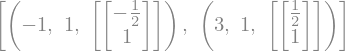

In [128]:
display(avects)

A solução geral do sistema é

$$
\mathbf{x}  =c_1\binom{1}{2} e^{3 t}+c_2\binom{1}{-2} e^{-t}
$$

Vamos plotar três visualizações: campo de direções, plano de fase e as componentes $x_1(t)$ e $x_2(t)$.

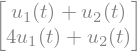

In [129]:
u1 = sp.Function('u1')
u2 = sp.Function('u2')
u = A*sp.Matrix([u1(t),u2(t)])
u

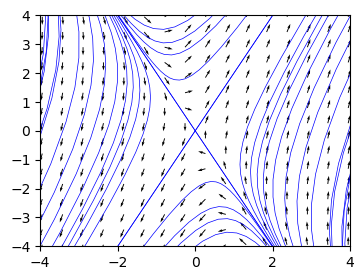

In [130]:
%matplotlib inline
eqs = [sp.Eq(sp.Derivative(u1(t), t), u[0]),
       sp.Eq(sp.Derivative(u2(t), t), u[1])]

ti = np.linspace(-10, 10, 200)

for c1 in np.linspace(-10,10, 11):
    for c2 in np.linspace(-10,10, 11):
        f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): c1, u2(0): c2})
        uu1 = sp.lambdify(t, f1.rhs)
        uu2 = sp.lambdify(t, f2.rhs)
        plt.plot(uu1(ti), uu2(ti), 'b-', linewidth=0.5)
    
x1,x2 = np.meshgrid(np.linspace(-5,5,20),
                    np.linspace(-5,5,20)) 

A = np.array(A, dtype=np.float64)
v1 = A[0,0]*x1 + A[0,1]*x2
v2 = A[1,0]*x1 + A[1,1]*x2

v1 = v1/np.sqrt(v1**2+v2**2)
v2 = v2/np.sqrt(v1**2+v2**2)
plt.quiver(x1, x2, v1, v2)

plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()

Agora combinando alguns plots

In [131]:
f1 = lambda t,c1,c2: -0.5*c1*np.exp(-t)+0.5*c2*np.exp(3*t)
f2 = lambda t,c1,c2: c1*np.exp(-t)+c2*np.exp(3*t)

In [132]:
import numpy as np
import matplotlib.pyplot as plt

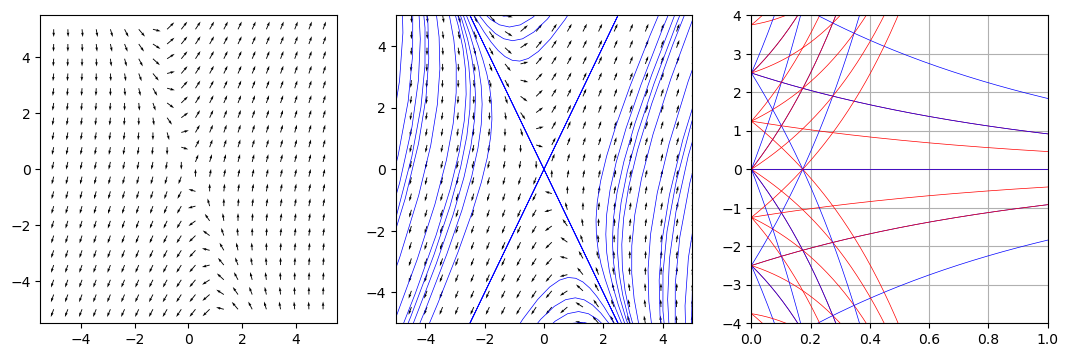

In [133]:
x1,x2 = np.meshgrid(np.linspace(-5,5,20),
                    np.linspace(-5,5,20))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

u1 = x1 + x2
u2 = 4*x1 + x2
u1 = u1/np.sqrt(u1**2+u2**2)
u2 = u2/np.sqrt(u1**2+u2**2)
axs[0].quiver(x1, x2, u1, u2)


ti = np.linspace(-10, 10, 200)
for c1 in np.linspace(-10, 10, 11):
    for c2 in np.linspace(-10, 10, 11):
        axs[1].plot(f1(ti,c1,c2), f2(ti,c1,c2), 'b-', linewidth=0.5)
axs[1].quiver(x1, x2, u1, u2)
axs[1].set_xlim([-5,5])
axs[1].set_ylim([-5,5])

ti = np.linspace(-1, 1, 200)
for c1 in np.linspace(-5, 5, 5):
    for c2 in np.linspace(-5, 5, 5):
        axs[2].plot(ti, f1(ti,c1,c2), 'r', linewidth=0.5)
        axs[2].plot(ti, f2(ti,c1,c2), 'b', linewidth=0.5)
axs[2].set_xlim([0,1])
axs[2].set_ylim([-4,4])
plt.grid()

plt.show()

**Exemplo 11.6: (Autovalores reais distintos de mesmo sinal)** 

([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/596/80/124/1:0%5B%2Ct%5D))
Considere o sistema

$$
x^{\prime}=\left(\begin{array}{cc}
-3 & \sqrt{2} \\
\sqrt{2} & -2
\end{array}\right) x
$$

Desenhe um campo de direções para este sistema e encontre sua solução geral. Depois desenhe um retrato de fase mostrando diversas trajetórias típicas no plano de fase.

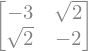

In [122]:
A = sp.Matrix([[-3, sp.sqrt(2)],[sp.sqrt(2),-2]])
A

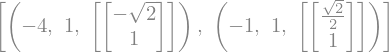

In [125]:
A.eigenvects()

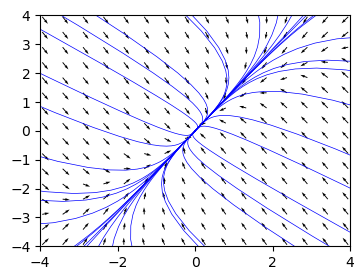

In [148]:
u1 = sp.Function('u1')
u2 = sp.Function('u2')

eqs = [sp.Eq(sp.Derivative(u1(t), t), -3*u1(t)+np.sqrt(2)*u2(t)),
       sp.Eq(sp.Derivative(u2(t), t),  np.sqrt(2)*u1(t)-2*u2(t))] 

ti = np.linspace(-10, 10, 200)


for c1 in np.linspace(-10,10, 6):
    for c2 in np.linspace(-10,10, 6):
        f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): c1, u2(0): c2})
        uu1 = sp.lambdify(t, f1.rhs)
        uu2 = sp.lambdify(t, f2.rhs)
        plt.plot(uu1(ti), uu2(ti), 'b-', linewidth=0.5)
    
x1,x2 = np.meshgrid(np.linspace(-5,5,20),
                    np.linspace(-5,5,20)) 

v1 = -3*x1+np.sqrt(2)*x2
v2 = np.sqrt(2)*x1-2*x2

v1 = v1/np.sqrt(v1**2+v2**2)
v2 = v2/np.sqrt(v1**2+v2**2)
plt.quiver(x1, x2, v1, v2)

plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()

**Exercício 2:** Para a solução do sistema do Exemplo 11.6, plote algumas curvas das componentes $x_1(t)$ e $x_2(t)$ em função do tempo para algumas constantes $C_1$ e $C_2$ e compare com o plano de fase.


**Exemplo 11.7: (Autovalores complexos)** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/652/5:30%5Bres%2C%20co%5D))
Encontre um conjunto fundamental de soluções reais para o sistema

$$
\mathbf{x}^{\prime}=\left(\begin{array}{cc}
-\frac{1}{2} & 1 \\
-1 & -\frac{1}{2}
\end{array}\right) \mathbf{x}
$$
Desenhe um retrato de fase e faça gráficos de componentes de soluções típicas.

In [149]:
A = sp.Matrix([[-1/2,1],[-1,-1/2]])

In [150]:
A.eigenvals()

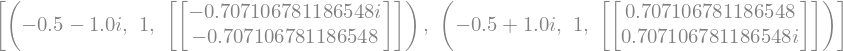

In [151]:
A.eigenvects()

In [152]:
t = sp.symbols('t', real = True)
c1, c2 = sp.symbols('c1, c2', real = True)

In [153]:
eqs = [sp.Eq(sp.Derivative(u1(t), t), (A*sp.Matrix([u1(t),u2(t)])).row(0)[0]),
       sp.Eq(sp.Derivative(u2(t), t), (A*sp.Matrix([u1(t),u2(t)])).row(1)[0])]
f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)])

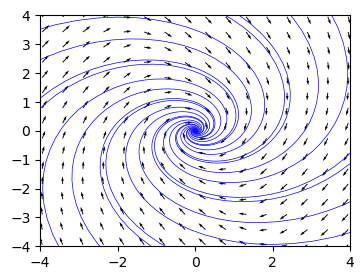

In [154]:
ti = np.linspace(-10, 10, 200)

for c1 in np.linspace(-5,5, 4):
    for c2 in np.linspace(-5,5,4):
        f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): c1, u2(0): c2})
        uu1 = sp.lambdify(t, f1.rhs)
        uu2 = sp.lambdify(t, f2.rhs)
        plt.plot(uu1(ti), uu2(ti), 'b-', linewidth=0.5)
        
x1,x2 = np.meshgrid(np.linspace(-5,5,20),
                    np.linspace(-5,5,20)) 

v1 = -1/2*x1+x2
v2 = -x1-1/2*x2

v1 = v1/np.sqrt(v1**2+v2**2)
v2 = v2/np.sqrt(v1**2+v2**2)
plt.quiver(x1, x2, v1, v2)

plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()
plt.show()

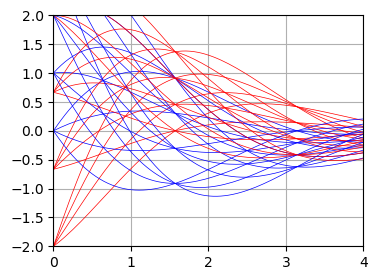

In [155]:
ti = np.linspace(0, 10, 200)
for c1 in np.linspace(-2,2, 4):
    for c2 in np.linspace(0,3,4):
        f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): c1, u2(0): c2})
        uu1 = sp.lambdify(t, f1.rhs)
        uu2 = sp.lambdify(t, f2.rhs)
        plt.plot(ti, uu1(ti), 'r-', linewidth=0.5)
        plt.plot(ti, uu2(ti), 'b-', linewidth=0.5)
        
plt.xlim([0,4])
plt.ylim([-2,2])
plt.grid()

**Exemplo 11.6: (Autovalores repetidos)** 

([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/938/37:65%5Bgui%2Cr.%5D))
Encontre um conjunto fundamental de soluções para

$$
\mathbf{x}^{\prime}=\mathrm{Ax}=\left(\begin{array}{rr}
1 & -1 \\
1 & 3
\end{array}\right) \mathbf{x}
$$

e desenhe um retrato de fase para este sistema.

In [157]:
A = sp.Matrix([[1,-1],[1,3]])
A.eigenvals()

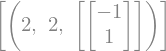

In [158]:
A.eigenvects()

In [159]:
eqs = [sp.Eq(sp.Derivative(u1(t), t), (A*sp.Matrix([u1(t),u2(t)])).row(0)[0]),
       sp.Eq(sp.Derivative(u2(t), t), (A*sp.Matrix([u1(t),u2(t)])).row(1)[0])]
f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)])

In [160]:
f1

In [161]:
f2

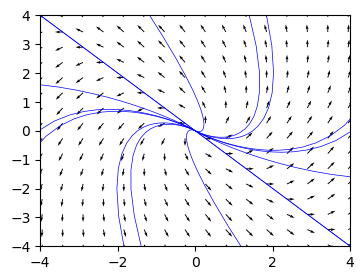

In [162]:
ti = np.linspace(-10, 10, 200)

for c1 in np.linspace(-5,5, 4):
    for c2 in np.linspace(-5,5,4):
        f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): c1, u2(0): c2})
        uu1 = sp.lambdify(t, f1.rhs)
        uu2 = sp.lambdify(t, f2.rhs)
        plt.plot(uu1(ti), uu2(ti), 'b-', linewidth=0.5)
        
x1,x2 = np.meshgrid(np.linspace(-5,5,20),
                    np.linspace(-5,5,20)) 



x1,x2 = np.meshgrid(np.linspace(-5,5,20),
                    np.linspace(-5,5,20)) 

v1 = x1-x2
v2 = x1+x2

v1 = v1/np.sqrt(v1**2+v2**2)
v2 = v2/np.sqrt(v1**2+v2**2)
plt.quiver(x1, x2, v1, v2)

plt.xlim([-4,4])
plt.ylim([-4,4])

plt.show()
plt.show()

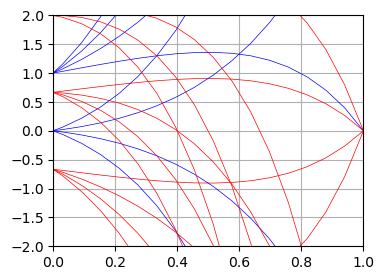

In [163]:
ti = np.linspace(-3, 3, 100)
for c1 in np.linspace(-2,2, 4):
    for c2 in np.linspace(0,3,4):
        f1, f2 = sp.dsolve(eqs, [u1(t), u2(t)], ics={u1(0): c1, u2(0): c2})
        uu1 = sp.lambdify(t, f1.rhs)
        uu2 = sp.lambdify(t, f2.rhs)
        plt.plot(ti, uu1(ti), 'r-', linewidth=0.5)
        plt.plot(ti, uu2(ti), 'b-', linewidth=0.5)
        
plt.xlim([0,1])
plt.ylim([-2,2])
plt.grid()

### Exercícios:

**1.** Em cada um dos problemas a seguir: Desenhe um campo de direções e esboce algumas trajetórias; descreva o comportamento das soluções quando t → ∞; e encontre a solução geral do sistema de equações.

(a) $\mathbf{y}^{\prime}=\left(\begin{array}{ll}3 & -4 \\ 1 & -1\end{array}\right) \mathbf{y}$

(b) $\mathbf{y}^{\prime}=\left(\begin{array}{ll}4 & -2 \\ 8 & -4\end{array}\right) \mathbf{y}$

**2:** Expresse a solução geral do sistema de equações dado em termos de funções reais e descreva o comportamento das soluções quando t → ∞.

(a) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{rr}-1 & -4 \\ 1 & -1\end{array}\right) \mathbf{y}$ 

(b) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{ll}2 & -5 \\ 1 & -2\end{array}\right) \mathbf{y}$

(c) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{ll}1 & -1 \\ 5 & -3\end{array}\right) \mathbf{y}$

(d) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{rr}1 & 2 \\ -5 & -1\end{array}\right) \mathbf{y}$


**3.** Expresse a solução geral do sistema de equações dado em termos de funções reais.

(a) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{rrr}
1 & 0 & 0 \\
2 & 1 & -2 \\
3 & 2 & 1
\end{array}\right) \mathbf{y}$


(b) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{rrr}
-3 & 0 & 2 \\
1 & -1 & 0 \\
-2 & -1 & 0
\end{array}\right) \mathbf{y}$

(c) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{rrr}
1 & 1 & 1 \\
2 & 1 & -1 \\
0 & -1 & 1
\end{array}\right) \mathbf{y}$

(d) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{lll}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}\right) \mathbf{y}$


**4.** Em cada um dos Problemas, encontre a solução do problema de valor inicial dado. Descreva o comportamento da solução quando t − ∞.

(a) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{ll}
1 & -5 \\
1 & -3
\end{array}\right) \mathbf{y}, \quad
\mathbf{y}(0)=\binom{1}{1}$

(b) $\quad \mathbf{y}^{\prime}=\left(\begin{array}{rr}
-3 & 2 \\
-1 & -1
\end{array}\right) \mathbf{y}, \quad
\mathbf{y}(0)=\binom{1}{-2}$

**Exemplo resolvido:** (Adaptado de [Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/38%5B%3Bvnd.vst.idref%3Dchapter07%5D!/4/706/17:34%5Bser%2C%C3%A3o%5D)) Um sistema com duas massas e três molas ilustrado como o da Figura 1
sem ação das forças externas, ou seja, $F_1(t) = 0$ e $F_2(t)= 0$, tem as seguintes equações governantes

$$
\begin{aligned}
& m_1 \frac{d^2 x_1}{d t^2}=-\left(k_1+k_2\right) x_1+k_2 x_2 \\
& m_2 \frac{d^2 x_2}{d t^2}=k_2 x_1-\left(k_2+k_3\right) x_2
\end{aligned}
$$

Essas equações podem ser resolvidas transformando-as em um sistema de quatro equações de primeira ordem, fazendo
$y_1=x_1, y_2=x_2, y_3=x_1{ }^{\prime}$ e $y_4=x_2{ }^{\prime}$. Então,

$$
\begin{aligned}
& y_1^{\prime}=y_3, \\
& y_2^{\prime}=y_4, \\
& m_1 y_3^{\prime}=-\left(k_1+k_2\right) y_1+k_2 y_2, \\
& m_2 y_4^{\prime}=k_2 y_1-\left(k_2+k_3\right) y_2 .
\end{aligned}
$$

Suponha que $m_1 = 2$, $m_2 = 9/4$, $k_1 = 1$, $k_2 = 3$ e $k_3 = 15/4$, então as equações ficam:

$$
y_1^{\prime}=y_3, \quad y_2^{\prime}=y_4, \quad y_3^{\prime}=-2 y_1+\frac{3}{2} y_2, \quad y_4^{\prime}=\frac{4}{3} y_1-3 y_2 .
$$

Podemos escrever o sistema em forma matricial como

$$
\mathbf{y}^{\prime}=\left(\begin{array}{cccc}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-2 & \frac{3}{2} & 0 & 0 \\
\frac{4}{3} & -3 & 0 & 0
\end{array}\right) \mathrm{y}=\mathrm{Ay}
$$

As funções $y_1$ e $y_2$ são as posições das duas massas em relação às suas posições de equilíbrio, e as funções $y_3$ e $y_4$ são suas velocidades. Para obter as soluções, precisamos calcular os autovalores da matriz $\mathbf{A}$ cuja equação caravterística é 
$$
\lambda^4+5 \lambda^2+4=\left(\lambda^2+1\right)\left(\lambda^2+4\right).
$$


Vamos analisaros movimentos possíveis e desenhar gráficos mostrando comportamentos típicos sabendo que a solução geral é 
$$
\mathbf{y}=c_1\left(\begin{array}{r}
3 \cos t \\
2 \cos t \\
-3 \operatorname{sen} t \\
-2 \operatorname{sen} t
\end{array}\right)+c_2\left(\begin{array}{l}
3 \operatorname{sen} t \\
2 \operatorname{sen} t \\
3 \cos t \\
2 \cos t
\end{array}\right)+c_3\left(\begin{array}{r}
3 \cos (2 t) \\
-4 \cos (2 t) \\
-6 \operatorname{sen}(2 t) \\
8 \operatorname{sen}(2 t)
\end{array}\right)+c_4\left(\begin{array}{r}
3 \operatorname{sen}(2 t) \\
-4 \operatorname{sen}(2 t) \\
6 \cos (2 t) \\
-8 \cos (2 t)
\end{array}\right)
$$

In [164]:
y1 = lambda t,c1,c2,c3,c4:  c1*3*np.cos(t)+c2*3*np.sin(t)+c3*np.cos(2*t)+c4*3*np.sin(2*t)


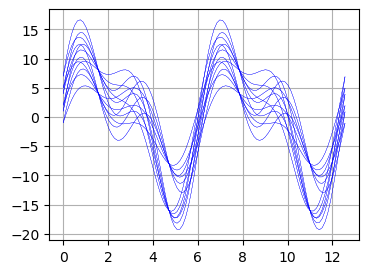

In [166]:
fig, ax = plt.subplots()
ti = np.linspace(0,2*6.28,100)
for c1 in [-1,0,1]:  
    for c2 in [2,4]:
        for c3 in [1,2]:
            for c4 in [1,2]:
                ax.plot(ti, y1(ti,c1,c2,c2,c3),'b', lw=0.2)

plt.grid()